<a href="https://colab.research.google.com/github/TitoBotelho/detectorFacial/blob/main/Detector_de_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Utilizando a rede YOLOV4 para detectar o meu rosto

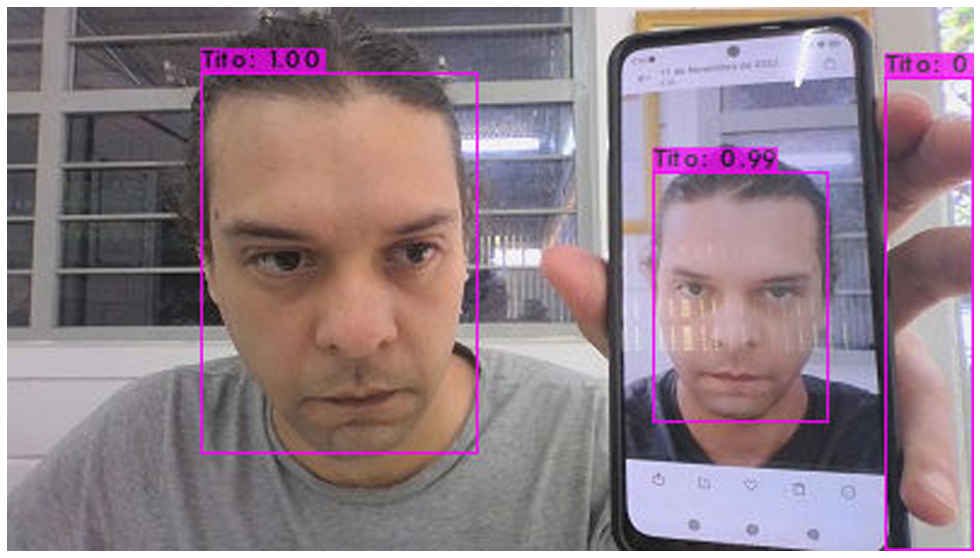

Para rotular imagens utilizei:

https://www.makesense.ai/

Tutorial de como utilizar a rede yolov4 no youtube:

https://www.youtube.com/watch?v=SCAgktactKE&t=748s

Código de referência:

https://colab.research.google.com/drive/1zqRb08ljHvIIMR4fgAXeNy1kUtjDU85B

# 1) Criar uma pasta chamada detectorFacial no Google drive
criar uma pasta chamada training dentro da pasta detectorFacial


# 2) Fazer a conexção com o Google drive e navegar até a pasta detectorFacial


In [ ]:
# fazer a conexão com o Google Drive para acessar as pastas

%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

# alterar My\ Drive/ para mydrive para facilitar

!ln -s /content/gdrive/My\ Drive/ /mydrive

# Verificar o conteúdo da pasta detectorFacial

!ls /mydrive/detectorFacial

#Navegar até a pasta /mydrive/detectorFacial

%cd /mydrive/detectorFacial

# 3) Clone do repositório da darknet no Github

In [ ]:
# clone do repositório yolo da darknet

!git clone https://github.com/AlexeyAB/darknet

# 4) Criar e fazer o upload dos arquivos para fazer o detector:
a. O dataset rotulado

b. O arquivo cfg

c.Os arquivos obj.data e obj.names

d.O arquivo process.py

Todos os arquivos e o dataset estão no meu GitHub

# 5) Fazer as mudanças no makefile para habilitar o OPENCV e GPU

In [ ]:
# change makefile to have GPU and OPENCV enabled
# also set CUDNN, CUDNN_HALF and LIBSO to 1

%cd darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

# 6) Rodar o comando make para buildar a darknet

In [ ]:
# build darknet 
!make

# 7) Copiar todos os arquivos da pasta yolov4 para o diretório darknet

In [ ]:
# Clean the data and cfg folders first except the labels folder in data which is required

%cd data/
!find -maxdepth 1 -type f -exec rm -rf {} \;
%cd ..

%rm -rf cfg/
%mkdir cfg

In [ ]:
# Unzip the obj.zip dataset and its contents so that they are now in /darknet/data/ folder 

!unzip /mydrive/detectorFacial/obj.zip -d data/

In [ ]:
# Copy the yolov4-custom.cfg file so that it is now in /darknet/cfg/ folder 

!cp /mydrive/detectorFacial/yolov4-custom.cfg cfg

# verify if your custom file is in cfg folder
!ls cfg/

In [ ]:
# Copy the obj.names and obj.data files from your drive so that they are now in /darknet/data/ folder 

!cp /mydrive/detectorFacial/obj.names data
!cp /mydrive/detectorFacial/obj.data  data

# verify if the above files are in data folder
!ls data/

In [ ]:
# Copy the process.py file to the current darknet directory 

!cp /mydrive/detectorFacial/process.py .

# 8) Rodar o script process.py para criar os arquivos train.txt e test.txt dentro da pasta de dados

In [ ]:
# run process.py ( this creates the train.txt and test.txt files in our darknet/data folder )
!python process.py

# list the contents of data folder to check if the train.txt and test.txt files have been created 
!ls data/

# 9)Download dos pesos pré-treinados da rede yolov4

In [ ]:
# Download the yolov4 pre-trained weights file
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

# 10) Treinamento

In [ ]:
# train your custom detector! (uncomment %%capture below if you run into memory issues or your Colab is crashing)
# %%capture

!./darknet detector train data/obj.data cfg/yolov4-custom.cfg yolov4.conv.137 -dont_show -map

# Se o treinamento cair no processo antes de acabar, rodar os passos 2, 5 e 6 e depois o seguinte comando:

In [ ]:
#to restart training your custom detector where you left off(using the weights that were saved last)

!./darknet detector train data/obj.data cfg/yolov4-custom.cfg /mydrive/detectorFacial/training/yolov4-custom_last.weights -dont_show -map

# Para imprimir o gráfico de erro, rodar o seguinte comando:

In [ ]:
# define helper function imShow
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
#only works if the training does not get interrupted
imShow('chart.png')

# Verificar os pesos dos treinamentos

In [ ]:
##You can check the mAP for all the saved weights to see which gives the best results ( xxxx here is the saved weight number like 4000, 5000 or 6000 snd so on )

!./darknet detector map data/obj.data cfg/yolov4-custom.cfg /mydrive/yolov4/training/yolov4-custom_4000.weights -points 0

In [ ]:
#set your custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-custom.cfg
%cd ..

# Para testar uma imagem, subir ela no google drive na pasta /detectorFacial_test_images

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, the thresh flag sets the minimum accuracy required for object detection)

!./darknet detector test data/obj.data cfg/yolov4-custom.cfg /mydrive/detectorFacial/training/yolov4-custom_best.weights /mydrive/detectorFacial_test_images/001.jpg -thresh 0.3 
imShow('predictions.jpg')